Objective - Improve customer experience by analysing sales datav and Increase revenue.

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset

df=pd.read_csv(r"C:\Users\vedan\OneDrive\Desktop\Python Eda\Eda datasets\Diwali Sales Data.csv",encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 14)

In [4]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed'],
      dtype='object')

In [5]:
# checking for null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


Amount column has some null values , while Status and Unnamed columns have only null values ,thus they are of no use for analysis.

In [6]:
# dropping blank columns

df.drop(['Status','Unnamed'],axis=1,inplace=True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# filter rows with atleast one null value

rows_with_nulls=df[df.isnull().any(axis=1)]

print("Rows with null values:")
print(rows_with_nulls)

Rows with null values:
     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  

In [10]:
# Calculate mean for each category and fill NA with mean for that category

df['Amount']=df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
# checking the values of Amount column

check_df=df[(df['User_ID']==1000326) & (df['Product_ID']=='P00120542')]
print(check_df)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
293  1000326  Jonathan  P00120542      M   53               0  Gujarat   

        Zone Occupation  Product_Category  Orders        Amount  
293  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [13]:
# change data type of Amount column
df['Amount']=df['Amount'].astype('int')  

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [17]:
# descriptive statistics of Age, Orders, Amount columns in the dataset

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [18]:
# defining a function to categorize age

def categorize_age(age):
    if age<=17:
        return '0-17'
    elif age<=25:
        return '18-25'
    elif age<=35:
        return '26-35'
    elif age<=45:
        return '36-45'
    elif age<=50:
        return '46-50'
    elif age<=55:
        return '51-55'
    else:
        return '55+'
    
# Apply the function to create a new column 'Age_group'
df['Age_group']=df['Age'].apply(categorize_age)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35


EDA- Exploratory Data Analysis

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

In [20]:
df.drop(['User_ID','Cust_name'],axis=1,inplace=True)

Gender column

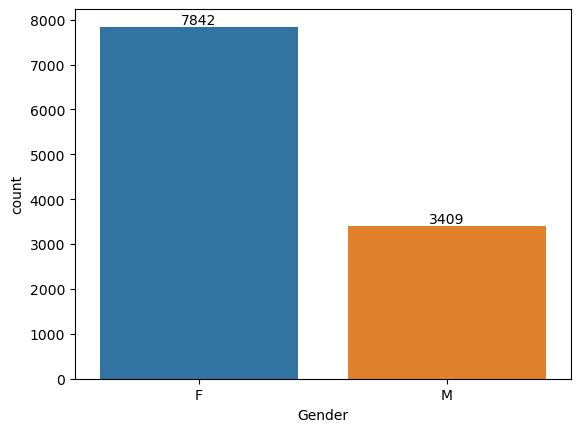

In [21]:
# plotting a bar chart for Gender and its count

ax= sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

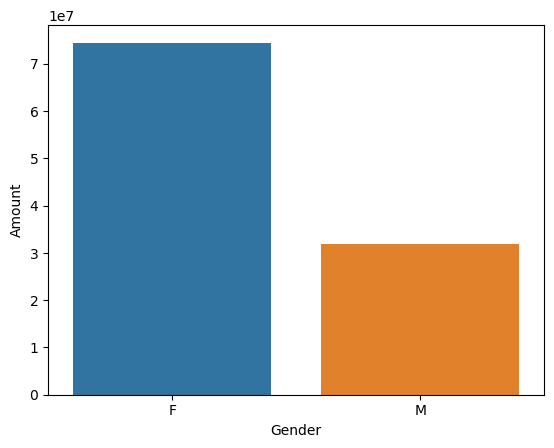

In [22]:
# plotting bar chart of Gender vs Total Amount

sales_gender= df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gender)

From above graphs, we can see that most of buyers are females and even the purchasing power of females are greater than males.

Age_group column

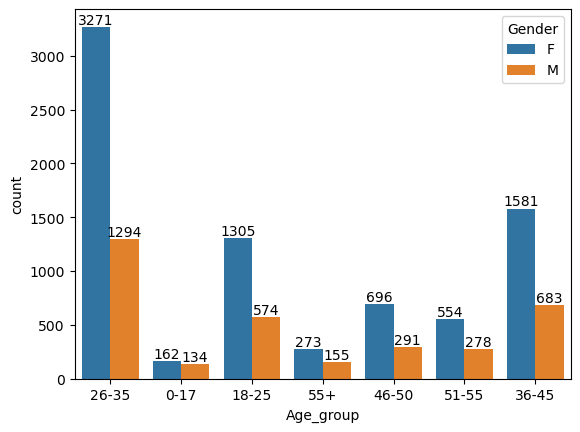

In [23]:
# plotting bar chart between age_group and its count

ax=sns.countplot(data=df,x='Age_group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_group', ylabel='Amount'>

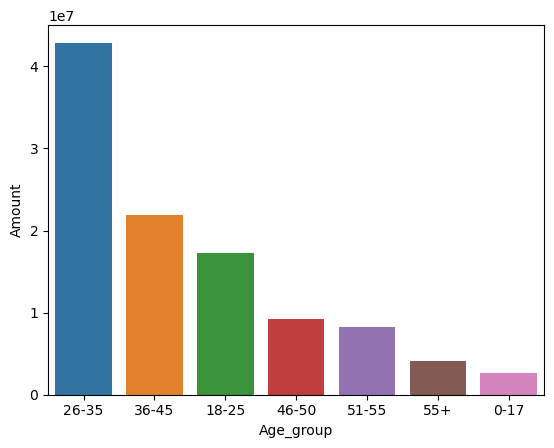

In [24]:
# Total Amount vs Age Group

sales_age=df.groupby(['Age_group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age_group',y='Amount',data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

State column

<Axes: xlabel='State', ylabel='Orders'>

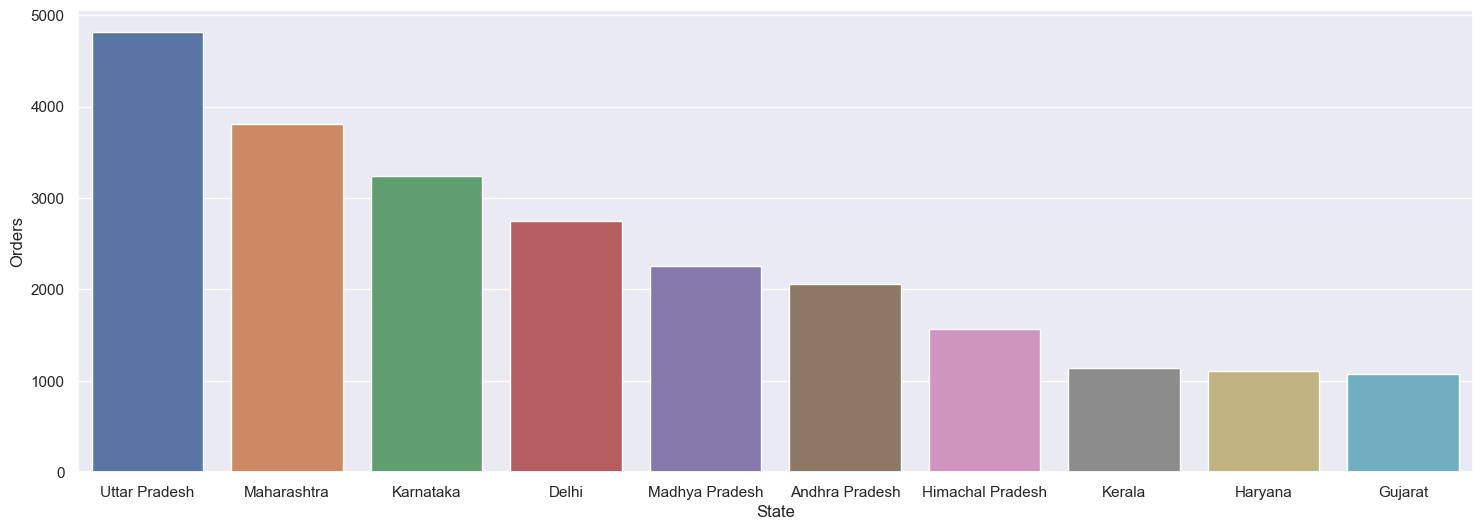

In [29]:
# total number of orders from top 10 states

sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

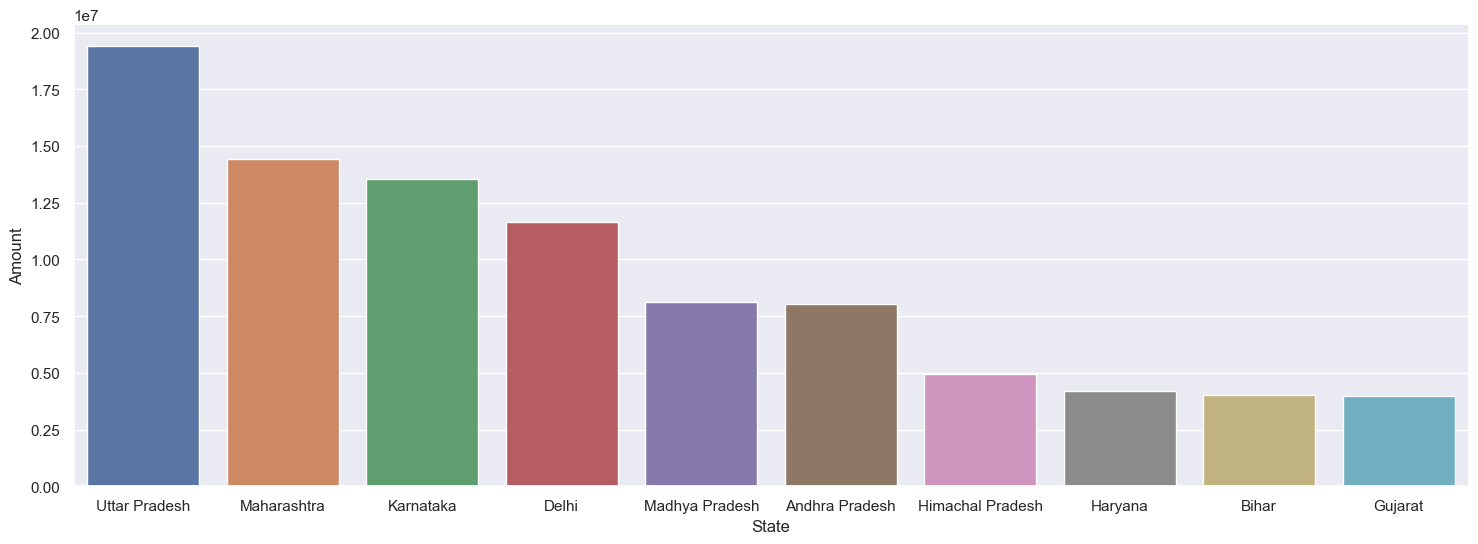

In [30]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<Axes: xlabel='State', ylabel='Amount'>

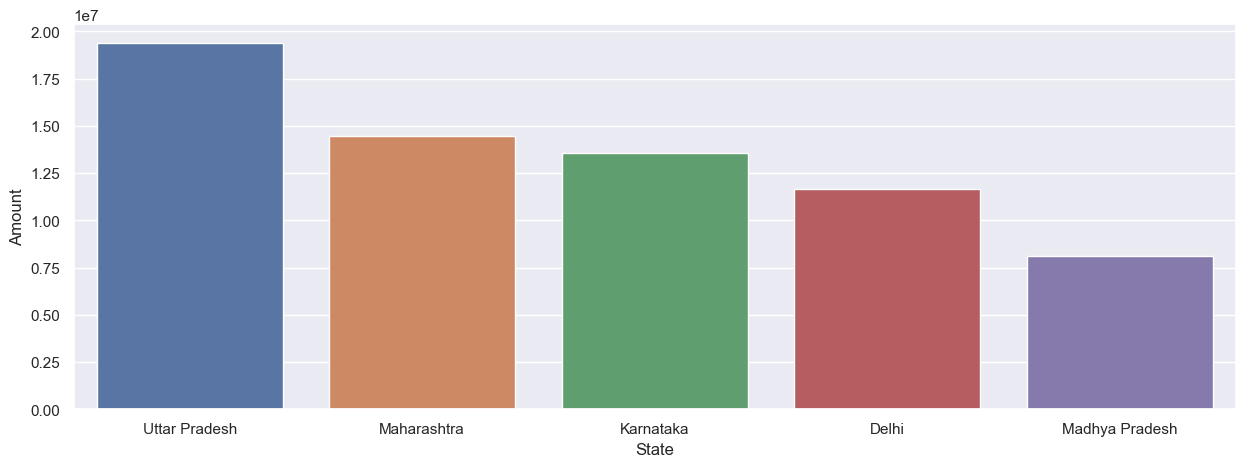

In [31]:
# total amount/sales from top 5 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Marital Status column

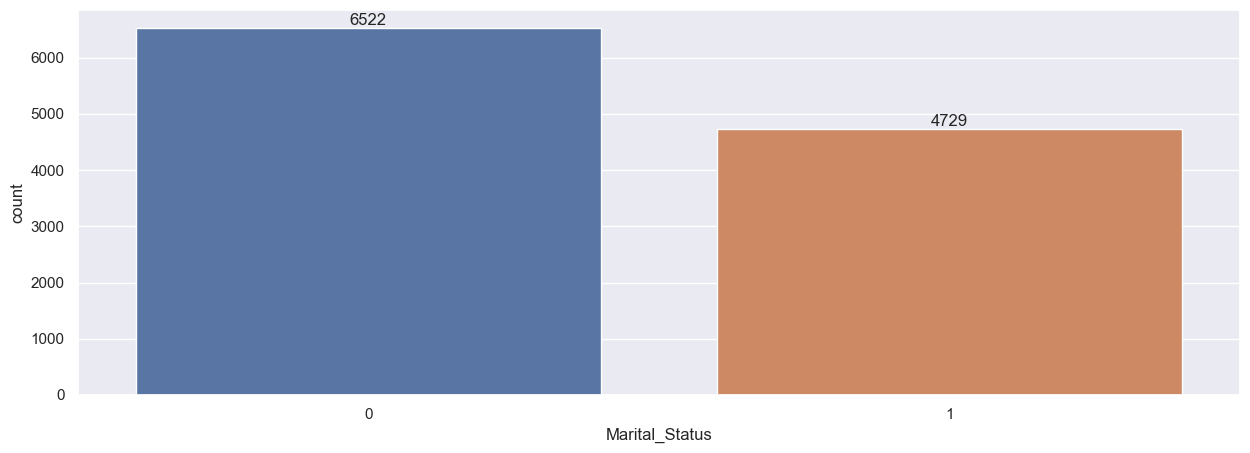

In [33]:
# Married vs unmarried by orders count

ax=sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

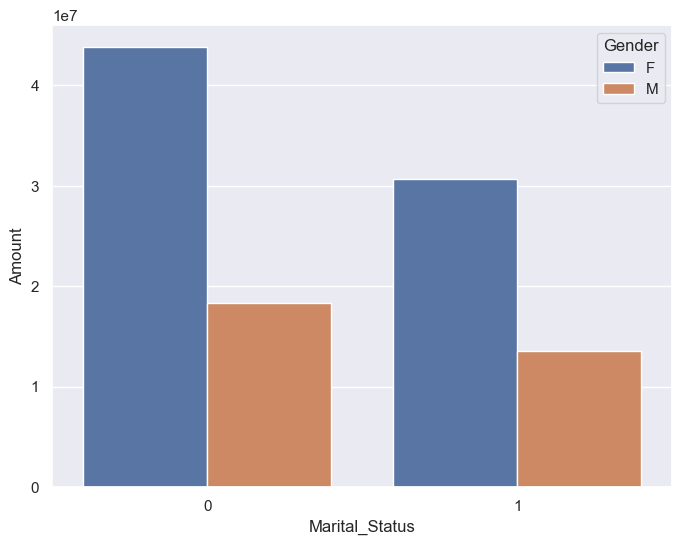

In [34]:
# Marital status and gender vs Total Amount

sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

Occupation column

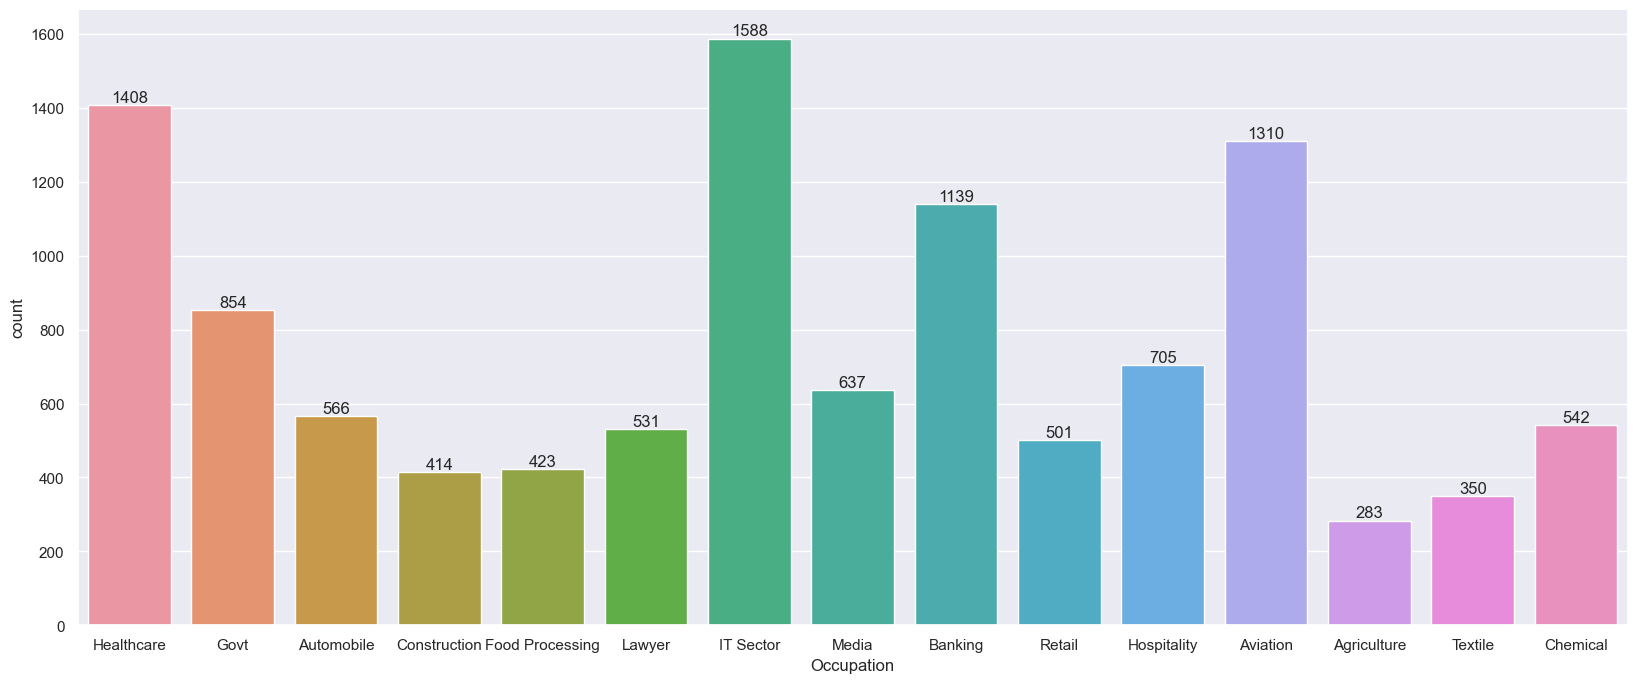

In [36]:
# Count of Orders by Occupation
sns.set(rc={'figure.figsize':(20,8)})

ax=sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

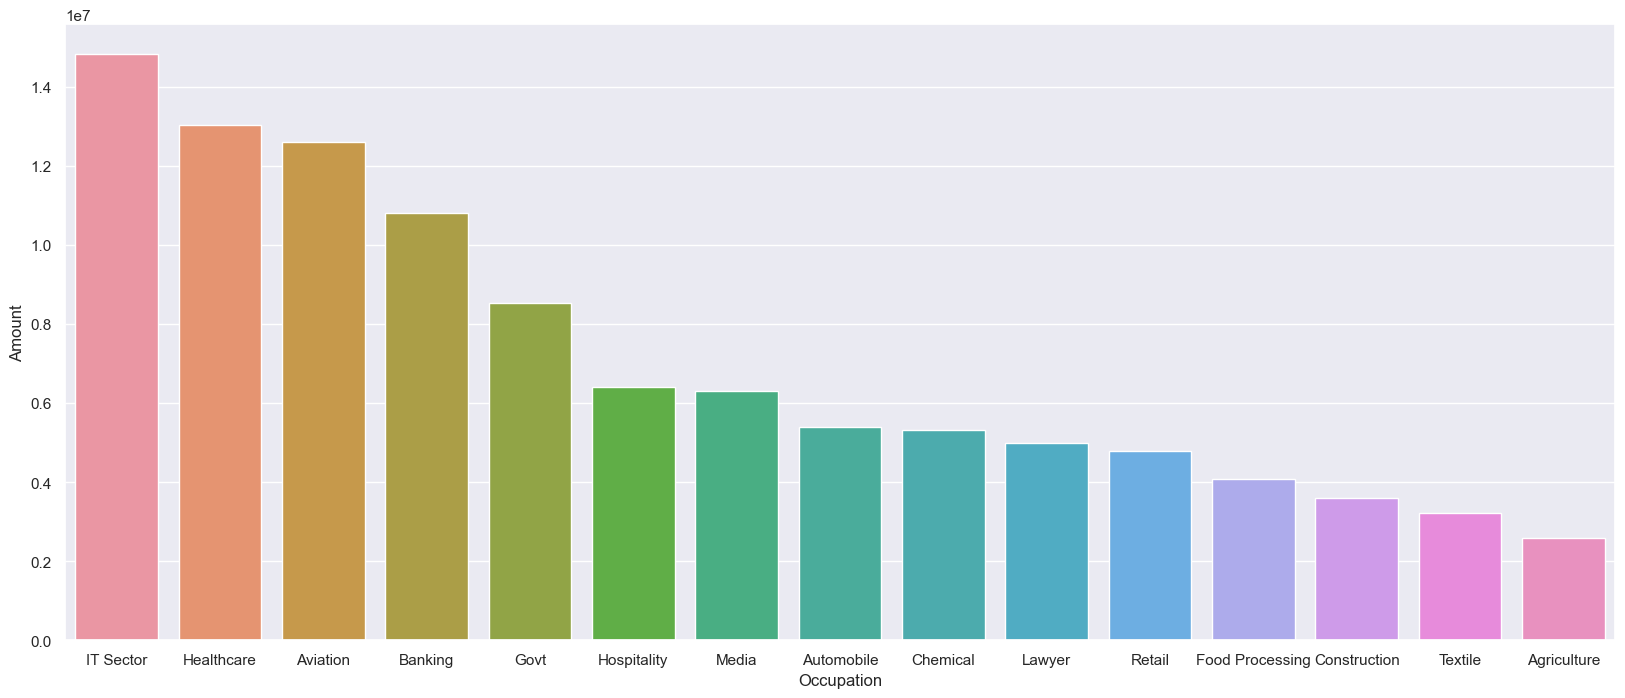

In [37]:
# Occupation vs Total Amount

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

Product Category column

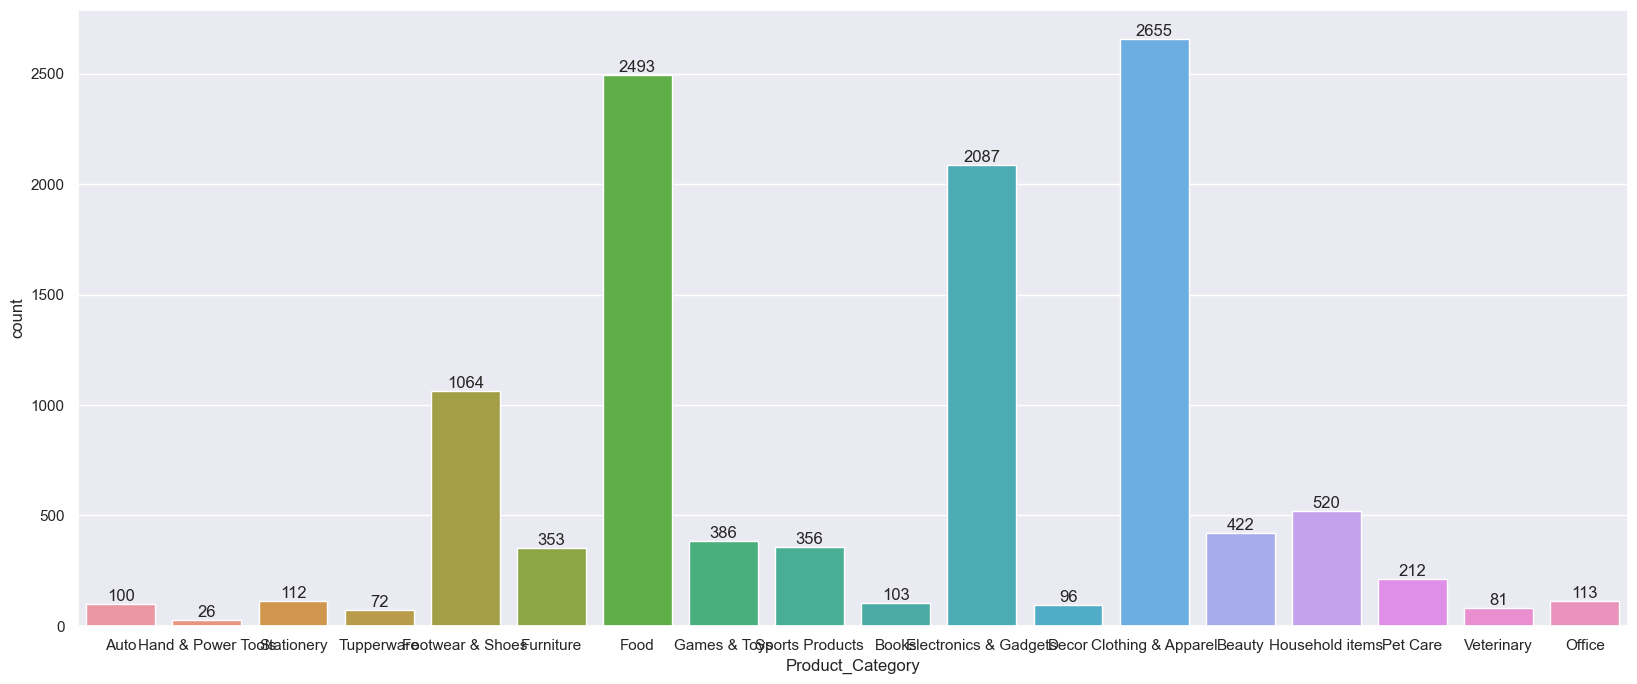

In [38]:
# Count of Orders by Product Category

sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

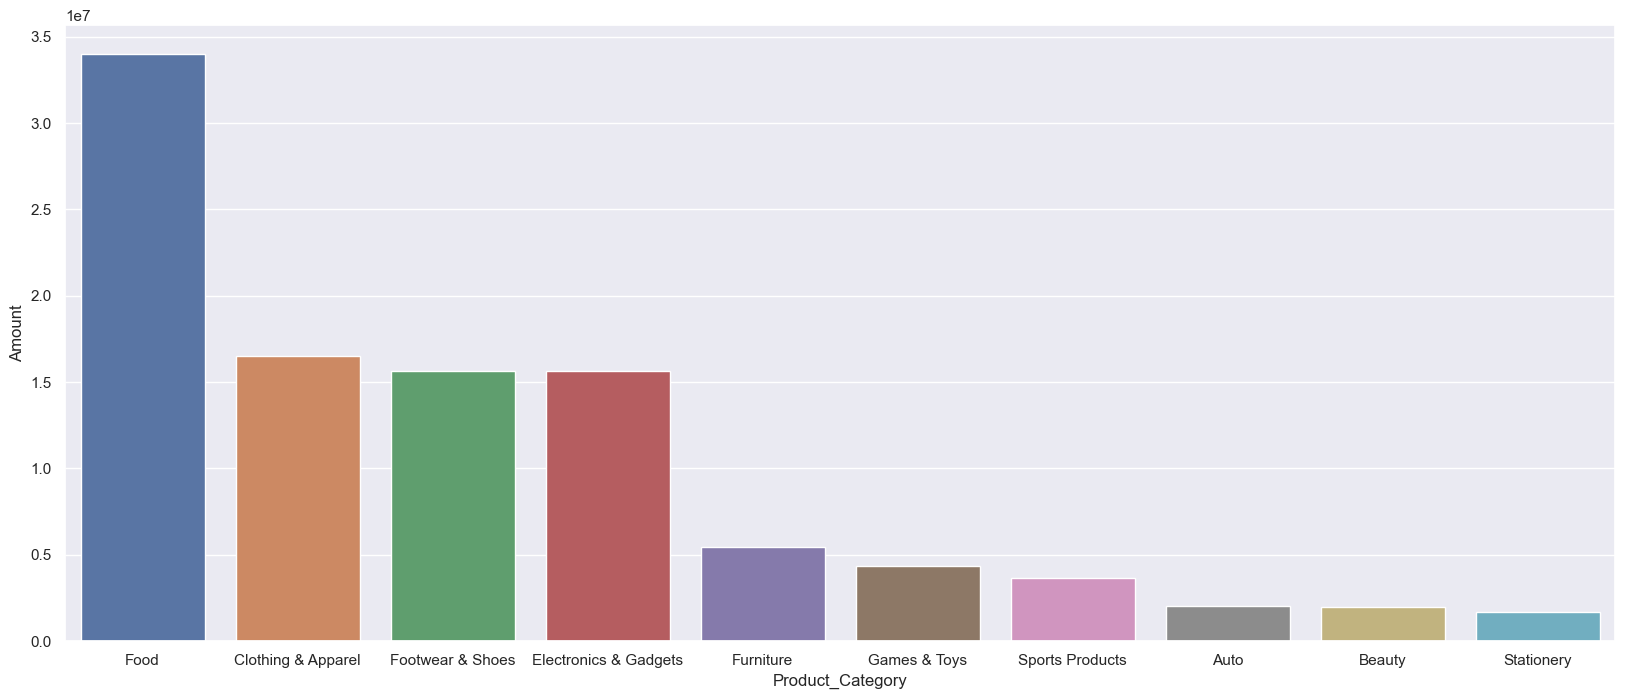

In [39]:
# Product Category vs Total Amount

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

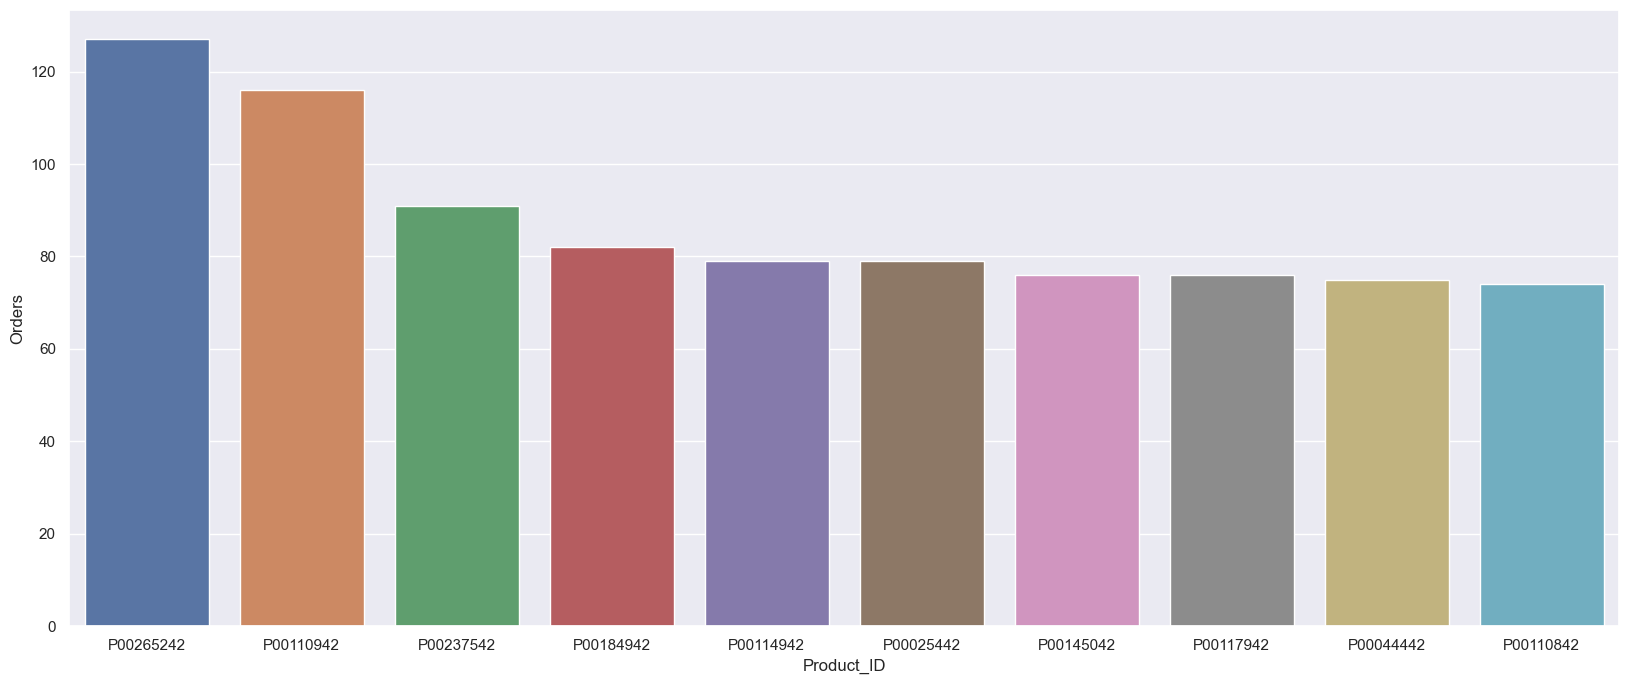

In [41]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

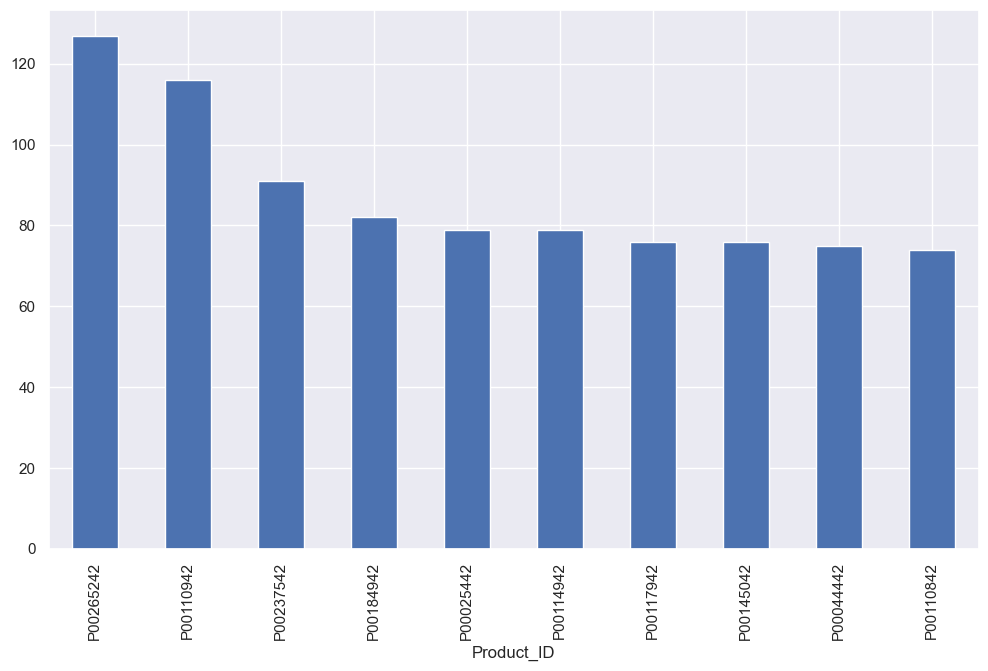

In [42]:
# top 10 most sold products 

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Insights Generated

1) Most of buyers are females and even the purchasing power of females are greater than males.

2) Most of the buyers are of age group between 26-35 yrs female.

3) Most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

4) Most of the buyers are married (women) and they have high purchasing power.

5) Most of the buyers are working in IT, Healthcare and Aviation sector.

6) Most of the sold products are from Food, Clothing and Electronics category.

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

